# Preprocesado de los archivos
Los archivos extraídos del analizador de espectro tienen una cobertura mayor ya que la tornamesa va de -190 a +190 grados con lo cual una partecita está superpuesta. También fué girada en distinto sentido en cada medición. El generador de RF fué configurado a 20dBm

El orden el el siguiente

| Número archivo | Polarización | Frecuencia | Pos. inicial | Pos final |
|---------------|--------------|------------|--------------|---------------------|
| 1 | Directa | 3.1GHz | -190 | +190 |
| 2 | Directa | 2.7GHz | +190 | -190 |
| 3 | Directa | 2.9GHz | -190 | +190 |
| 4 | Cruzada | 2.7GHz | -190 | +190 |
| 5 | Cruzada | 2.9GHz | +190 | -190 |
| 6 | Cruzada | 3.1GHz | -190 | +190 |

Vamos a probar el espejado y guardado de archivos

In [1]:
from scripts.sa_data import SAData, load_sa_data

In [2]:
a = load_sa_data('./Mediciones/1ra med 31Ghz.DAT')

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Superposition Visualization - dBm'}, xlabel='Position from Center', ylabel='dBm'>)

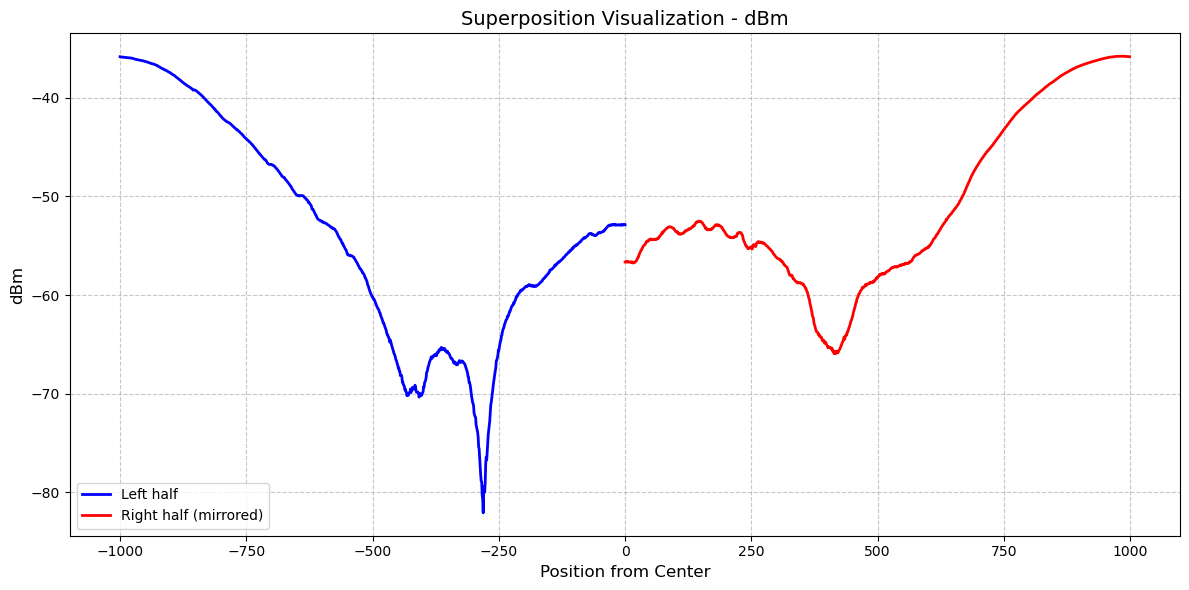

In [3]:
# Visualizar superposición con desplazamientos
a.plot_superposition(
    mag='dBm'
)

# Obtener puntos de corte para recortar
#left_cut = cut_info['left_cut']   # Ej: 187.5
#right_cut = cut_info['right_cut'] # Ej: 192.3

# Usar estos valores para recortar
#data.crop_data(start_value=left_cut, end_value=right_cut, in_place=True)


In [ ]:
from scripts.sa_data import SAData, load_sa_data

In [ ]:
directa_2_7GHz = load_sa_data('./Mediciones/3ra med 27Ghz.DAT')

In [ ]:
directa_2_7GHz.plot_polar()

In [ ]:
piso_ruido         = load_sa_data('./data/File_001_PISO_DE_RUIDO2.DAT')
biantena_vertical1 = load_sa_data('./data/biantenavertical.DAT')#esta
biantena_vertical2 = load_sa_data('./data/File_001_biantena_vert.DAT')
biantena_vertical3 = load_sa_data('./data/2da_medicioon_de_antenavert.DAT')

biantena_horizontal1 = load_sa_data('./data/biantenhorz_001.DAT')#esta
biantena_horizontal2 = load_sa_data('./data/2da-medicion-horizontal_002.DAT')
biantena_horizontal3 = load_sa_data('./data/2da-medicion-horizontal_003.DAT')

In [ ]:
piso_ruido2 = SAData('./data/File_001_PISO_DE_RUIDO2.DAT')

In [ ]:
piso_ruido.plot_time(mag='dBm', y_limits=(-90, -70), legend=True, savefig='ploteos/piso_ruido.png',
                    figsize=(12, 3))

In [ ]:
biantena_vertical1.plot_time(mag='dBm', legend=True, y_limits=(-60, -40), savefig='ploteos/biconica_vertical_1.png')
biantena_vertical1.plot_polar(mag='dB', legend=True, normalize=True, mag_limits=(-6, 3), savefig='ploteos/biconica_vertical_1_polar.png')

In [ ]:
biantena_horizontal1.plot_time(mag='dBm', y_limits=(-70, -40), savefig='ploteos/biconica_horizontal_1.png')
biantena_horizontal1.plot_polar(mag='dB', mag_limits=(-39, 3), legend=True, savefig='ploteos/biconica_horizontal_1_polar.png')

In [ ]:
biantena_vertical2.plot_time(mag='dBm', y_limits=(-60, -40), savefig='ploteos/biconica_vertical_2.png')
biantena_vertical2.plot_polar(mag='dBm', mag_limits=(-60, -40), savefig='ploteos/biconica_vertical_2_polar.png')

In [ ]:
biantena_vertical3.plot_time(mag='dBm', legend=True, y_limits=(-60, -30))
#biantena_vertical3.plot_polar(mag='dBm', mag_limits=(-60, -30), savefigure='Ploteos/cambio_polarizacion.png')

Vamos a analizar la polarizaación cruzada. Para esto uso de los datos anteriores la medición en polarización cruzada y derecha

In [ ]:
y = biantena_vertical3.get_y1_data()
x = biantena_vertical3.get_x_data()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo: si no los tenés definidos
# x = np.linspace(0,100,500)
# y = -50 + 10*np.sin(np.radians(x))

# Parámetros opcionales
plot_params = {'linewidth': 1.5, 'label': 'Medición'}
ax_params = {
    'title': 'Medicion de polarizacion cruzada',
    'xlabel': 'Ángulo [°]',
    'ylabel': 'Potencia [dBm]',
    'xlim': (min(x), max(x)),
    'ylim': (-60, -30)
}

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8,6))

# Plot principal
ax.plot(x, y, **plot_params)

# Puntos de interés
targets = {20: "Polarización cruzada", 60: "Polarización co-polar"}
for xtarget, label in targets.items():
    idx = np.argmin(np.abs(x - xtarget))   # índice más cercano a xtarget
    x_val, y_val = x[idx], y[idx]

    # Línea vertical
    ax.axvline(x_val, color="red", linestyle="--", alpha=0.7)

    # Flecha + etiqueta con valor
    ax.annotate(f"{label}\n{y_val:.2f} dBm",
                xy=(x_val, y_val),            # punto en la curva
                xytext=(x_val+5, y_val+3),    # posición del texto
                arrowprops=dict(facecolor="black", arrowstyle="->"),
                fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="k", alpha=0.6))

# Configuración de ejes
ax.set_title(ax_params.get('title', 'Medición'), fontsize=14)
ax.set_xlabel(ax_params.get('xlabel', 'X'), fontsize=12)
ax.set_ylabel(ax_params.get('ylabel', 'Y'), fontsize=12)

if 'xlim' in ax_params:
    ax.set_xlim(ax_params['xlim'])
if 'ylim' in ax_params:
    ax.set_ylim(ax_params['ylim'])

ax.grid(True, which='both', linestyle='--', alpha=0.7)
ax.legend()

# Guardar imagen
plt.savefig('ploteos/polarizacion_cruzada.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
biantena_horizontal2.plot_time(mag='dBm')
#biantena_horizontal2.plot_polar(mag='dBm')

In [ ]:
biantena_horizontal3.plot_time(mag='dBm')
#biantena_horizontal3.plot_polar(mag='dBm')

In [ ]:
biantena_vertical3.data['y1'].max()

# Comparativa para ganancia
Voy a superponer dos gráficos para calcular la ganancia